# Машинное обучение
# Лабораторная работа №2
## Ширшов Алексей 19-ИВТ-2
### Вариант 3

Задание: "Вторичный рынок машин"

1. Удалите столбцы, ценность которых для оценки стоимости машины низка.
2. Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.
3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.
4. Заполнить пропущенные данные в строковых полях.
5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.
6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.
7. Постройте карту корреляций между признаками. Выведите также числовые значения признаков.
8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков.
9. Добавьте в набор данных признак, являющийся суммой двух других признаков.


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


autos_df = pd.read_csv("autos.csv", encoding='iso-8859-1')

In [2]:
autos_df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
autos_df.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10


In [4]:
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [5]:
autos_df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


### 1. Удалите столбцы, ценность которых для оценки стоимости машины низка.

In [6]:
evaluation_price_df = autos_df.drop(["dateCrawled", "seller", "offerType", "abtest", "monthOfRegistration", 
                                     "nrOfPictures", "postalCode"], 
                                    axis="columns")
evaluation_price_df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN,2016-03-24 00:00:00,2016-04-07 03:16:57
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja,2016-03-24 00:00:00,2016-04-07 01:46:50
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN,2016-03-14 00:00:00,2016-04-05 12:47:46
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,2016-03-17 00:00:00,2016-03-17 17:40:17
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,2016-03-31 00:00:00,2016-04-06 10:17:21


### 2. Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.

In [7]:
print("Изначальный кол-во строк до удаления пустых и дублирующихся строк:", evaluation_price_df.shape)

without_dupl_df = evaluation_price_df.drop_duplicates()
print("Кол-во строк после удаления строк с дубликатами", without_dupl_df.shape)

without_nan_df = evaluation_price_df.dropna()
print("Кол-во строк после удаления строк с пропусками", without_nan_df.shape)

without_nan_dupl_df = without_nan_df.drop_duplicates()
print("Кол-во строк после удаления строк с пропусками и дубликатами", without_nan_dupl_df.shape)
without_nan_dupl_df

Изначальный кол-во строк до удаления пустых и дублирующихся строк: (371528, 13)
Кол-во строк после удаления строк с дубликатами (371486, 13)
Кол-во строк после удаления строк с пропусками (260956, 13)
Кол-во строк после удаления строк с пропусками и дубликатами (260921, 13)


,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,2016-03-17 00:00:00,2016-03-17 17:40:17
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,2016-03-31 00:00:00,2016-04-06 10:17:21
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja,2016-04-04 00:00:00,2016-04-06 19:17:07
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein,2016-04-01 00:00:00,2016-04-05 18:18:39
7,VW_Derby_Bj_80__Scheunenfund,0,limousine,1980,manuell,50,andere,40000,benzin,volkswagen,nein,2016-03-21 00:00:00,2016-03-25 16:47:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,turbo_defekt,3200,limousine,2004,manuell,225,leon,150000,benzin,seat,ja,2016-03-19 00:00:00,2016-03-19 20:44:43
371521,Opel_Zafira_1.6_Elegance_TÜV_12/16,1150,bus,2000,manuell,0,zafira,150000,benzin,opel,nein,2016-03-27 00:00:00,2016-03-29 10:17:23
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,nein,2016-03-05 00:00:00,2016-03-11 18:17:12
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,nein,2016-03-19 00:00:00,2016-04-07 07:15:26


### 3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.

<AxesSubplot:>

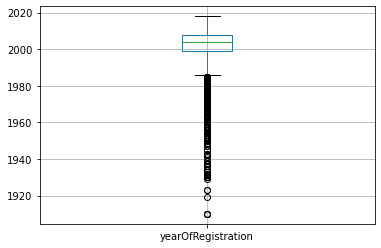

In [8]:
without_nan_dupl_df.boxplot(column=["yearOfRegistration"])

<AxesSubplot:>

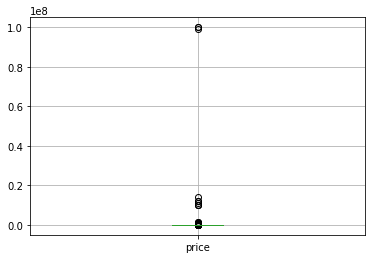

In [9]:
without_nan_dupl_df.boxplot(column=["price"])

<AxesSubplot:>

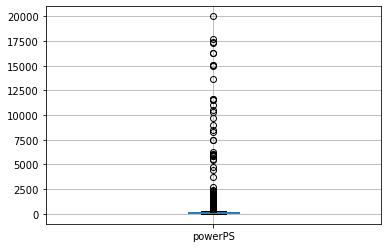

In [10]:
without_nan_dupl_df.boxplot(column=["powerPS"])

In [11]:
print("Кол-во строк до удаления данных, выходящих за пределы", without_nan_dupl_df.shape)

filtered_autos_df = without_nan_dupl_df[
    (without_nan_dupl_df.yearOfRegistration <= 2016) & (without_nan_dupl_df.yearOfRegistration >= 1990) & 
    (without_nan_dupl_df.price <= 12000) & (without_nan_dupl_df.price >= 500) &
    (without_nan_dupl_df.powerPS <= 200) & (without_nan_dupl_df.powerPS >= 10)
]

print("Кол-во строк после удаления данных, выходящих за пределы", filtered_autos_df.shape)

Кол-во строк до удаления данных, выходящих за пределы (260921, 13)
Кол-во строк после удаления данных, выходящих за пределы (184401, 13)


<AxesSubplot:>

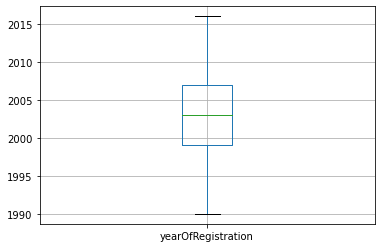

In [12]:
filtered_autos_df.boxplot(column=["yearOfRegistration"])

<AxesSubplot:>

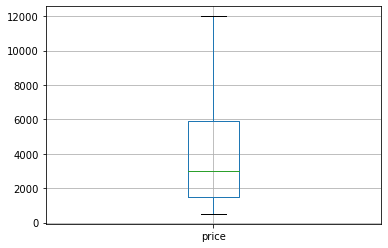

In [13]:
filtered_autos_df.boxplot(column=["price"])

<AxesSubplot:>

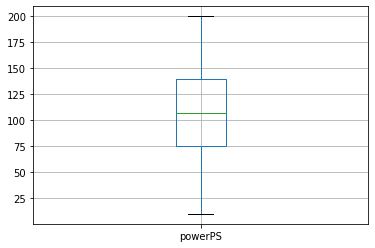

In [14]:
filtered_autos_df.boxplot(column=["powerPS"])

In [15]:
filtered_autos_df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,2016-03-17 00:00:00,2016-03-17 17:40:17
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,2016-03-31 00:00:00,2016-04-06 10:17:21
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja,2016-04-04 00:00:00,2016-04-06 19:17:07
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein,2016-04-01 00:00:00,2016-04-05 18:18:39
10,Mazda_3_1.6_Sport,2000,limousine,2004,manuell,105,3_reihe,150000,benzin,mazda,nein,2016-03-26 00:00:00,2016-04-06 10:45:34


In [16]:
filtered_autos_df.tail()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
371513,Seat_Leon_1.9_TDI_4/5_Tueren,4400,limousine,2008,manuell,105,leon,150000,diesel,seat,nein,2016-03-21 00:00:00,2016-04-06 15:45:01
371516,Volkswagen_Lupo_1.0,1490,kleinwagen,1998,manuell,50,lupo,150000,benzin,volkswagen,nein,2016-04-04 00:00:00,2016-04-06 11:17:13
371517,Volkswagen_Golf_2.0_TDI_DPF_Team,7900,limousine,2010,manuell,140,golf,150000,diesel,volkswagen,nein,2016-03-28 00:00:00,2016-04-02 18:16:20
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,nein,2016-03-05 00:00:00,2016-03-11 18:17:12
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,nein,2016-03-19 00:00:00,2016-04-07 07:15:26


### 4. Заполнить пропущенные данные в строковых полях

In [17]:
without_dupl_df.isnull().sum()

name                      0
price                     0
vehicleType           37869
yearOfRegistration        0
gearbox               20208
powerPS                   0
model                 20484
kilometer                 0
fuelType              33383
brand                     0
notRepairedDamage     72055
dateCreated               0
lastSeen                  0
dtype: int64

In [18]:
filled_autos_df = without_dupl_df.fillna("empty")
filled_autos_df

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
0,Golf_3_1.6,480,empty,1993,manuell,0,golf,150000,benzin,volkswagen,empty,2016-03-24 00:00:00,2016-04-07 03:16:57
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,empty,125000,diesel,audi,ja,2016-03-24 00:00:00,2016-04-07 01:46:50
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,diesel,jeep,empty,2016-03-14 00:00:00,2016-04-05 12:47:46
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,2016-03-17 00:00:00,2016-03-17 17:40:17
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,2016-03-31 00:00:00,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,2200,empty,2005,empty,0,empty,20000,empty,sonstige_autos,empty,2016-03-14 00:00:00,2016-04-06 00:46:52
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,nein,2016-03-05 00:00:00,2016-03-11 18:17:12
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,nein,2016-03-19 00:00:00,2016-04-07 07:15:26
371526,VW_Golf_Kombi_1_9l_TDI,3400,kombi,2002,manuell,100,golf,150000,diesel,volkswagen,empty,2016-03-20 00:00:00,2016-03-24 12:45:21


In [19]:
filled_autos_df.isnull().sum()

name                  0
price                 0
vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
model                 0
kilometer             0
fuelType              0
brand                 0
notRepairedDamage     0
dateCreated           0
lastSeen              0
dtype: int64

### 5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.

<AxesSubplot:>

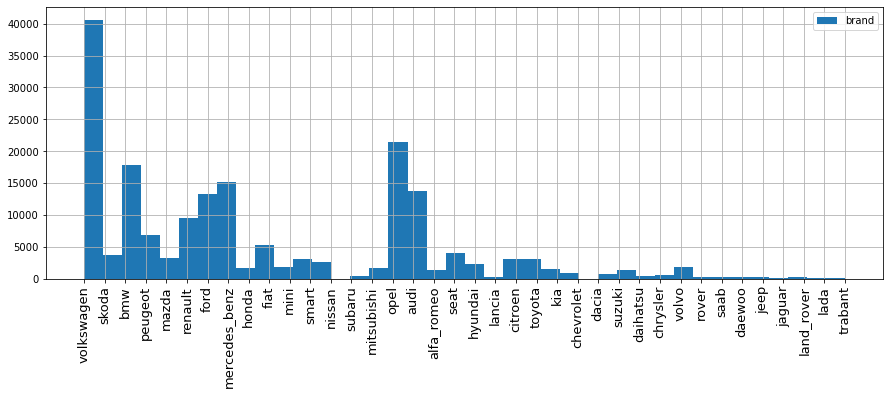

In [20]:
filtered_autos_df.brand.hist(xrot=90, bins=40, legend=True, xlabelsize=13,  figsize = (15,5))

<AxesSubplot:>

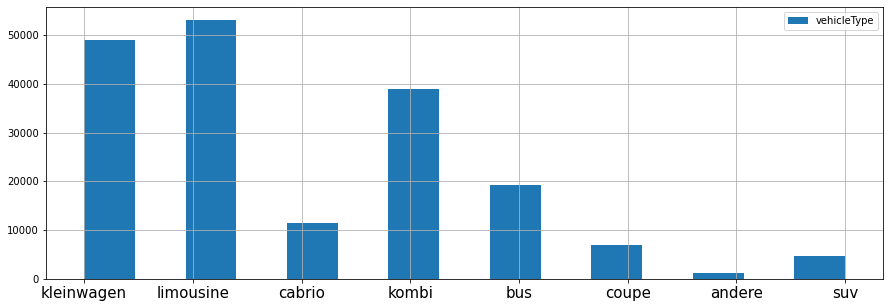

In [21]:
filtered_autos_df.vehicleType.hist(bins=15, legend=True, xlabelsize=15,  figsize = (15,5))

<AxesSubplot:>

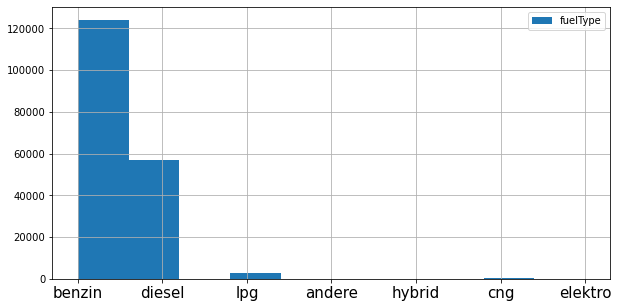

In [22]:
filtered_autos_df.fuelType.hist(bins=10, legend=True, xlabelsize=15,  figsize = (10,5))

### 6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.

In [23]:
def get_name_lenght(name):
    return len(str(name))

filtered_autos_df["nameLenght"] = filtered_autos_df["name"].apply(get_name_lenght)
filtered_autos_df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,nameLenght
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,2016-03-17 00:00:00,2016-03-17 17:40:17,18
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,2016-03-31 00:00:00,2016-04-06 10:17:21,30
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja,2016-04-04 00:00:00,2016-04-06 19:17:07,50
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein,2016-04-01 00:00:00,2016-04-05 18:18:39,27
10,Mazda_3_1.6_Sport,2000,limousine,2004,manuell,105,3_reihe,150000,benzin,mazda,nein,2016-03-26 00:00:00,2016-04-06 10:45:34,17


### 7. Постройте карту корреляций между признаками. Выведите также числовые значения признаков.

<AxesSubplot:>

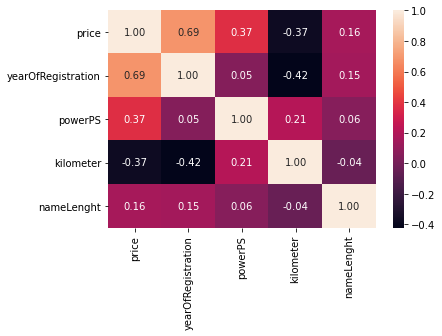

In [24]:
import seaborn as sns

sns.heatmap(filtered_autos_df.corr(), annot=True, fmt=".2f")

### 8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков.

In [25]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()

pearson = pearsonr(filtered_autos_df.price, pd.Series(label_encoder.fit_transform(filtered_autos_df.vehicleType)))
spearman = spearmanr(filtered_autos_df.price, pd.Series(label_encoder.fit_transform(filtered_autos_df.vehicleType)))

In [27]:
print("Коэффициент корреляции Пирсона между стоимостью авто и типом кузова:", pearson)
print("Коэффициент корреляции Спирмена между стоимостью авто и типом кузова:", spearman)

Коэффициент корреляции Пирсона между стоимостью авто и типом кузова: (-0.04170911610551423, 8.476363106184162e-72)
Коэффициент корреляции Спирмена между стоимостью авто и типом кузова: SpearmanrResult(correlation=-0.011909043764137086, pvalue=3.152055938330835e-07)


In [28]:
print("Коэффициент Пирсона:")
if (pearson[1] < 0.05):
    print("p-value < 0.05, статистически незначима")
else:
    print("P-value >= 0.05, вероятность ошибки первого рода значительна")
    
print("Коэффициент Спирмена:")
if (spearman[1] < 0.05):
    print("p-value < 0.01, статистически незначима")
else:
    print("P-value >= 0.01, вероятность ошибки первого рода значительна")

Коэффициент Пирсона:
p-value < 0.05, статистически незначима
Коэффициент Спирмена:
p-value < 0.01, статистически незначима


<AxesSubplot:ylabel='Density'>

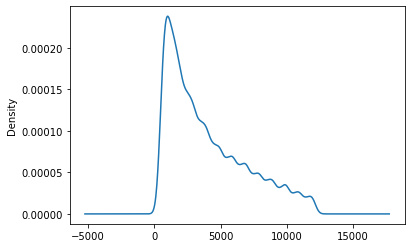

In [29]:
filtered_autos_df.price.plot.kde()

### 9. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [30]:
filtered_autos_df["nameAndFuelType"] = filtered_autos_df["name"] + " " + filtered_autos_df["fuelType"]
filtered_autos_df

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,nameLenght,nameAndFuelType
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,2016-03-17 00:00:00,2016-03-17 17:40:17,18,GOLF_4_1_4__3TÜRER benzin
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,2016-03-31 00:00:00,2016-04-06 10:17:21,30,Skoda_Fabia_1.4_TDI_PD_Classic diesel
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja,2016-04-04 00:00:00,2016-04-06 19:17:07,50,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein,2016-04-01 00:00:00,2016-04-05 18:18:39,27,Peugeot_206_CC_110_Platinum benzin
10,Mazda_3_1.6_Sport,2000,limousine,2004,manuell,105,3_reihe,150000,benzin,mazda,nein,2016-03-26 00:00:00,2016-04-06 10:45:34,17,Mazda_3_1.6_Sport benzin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371513,Seat_Leon_1.9_TDI_4/5_Tueren,4400,limousine,2008,manuell,105,leon,150000,diesel,seat,nein,2016-03-21 00:00:00,2016-04-06 15:45:01,28,Seat_Leon_1.9_TDI_4/5_Tueren diesel
371516,Volkswagen_Lupo_1.0,1490,kleinwagen,1998,manuell,50,lupo,150000,benzin,volkswagen,nein,2016-04-04 00:00:00,2016-04-06 11:17:13,19,Volkswagen_Lupo_1.0 benzin
371517,Volkswagen_Golf_2.0_TDI_DPF_Team,7900,limousine,2010,manuell,140,golf,150000,diesel,volkswagen,nein,2016-03-28 00:00:00,2016-04-02 18:16:20,32,Volkswagen_Golf_2.0_TDI_DPF_Team diesel
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,nein,2016-03-05 00:00:00,2016-03-11 18:17:12,37,Smart_smart_leistungssteigerung_100ps benzin
